In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
fichier = "../Clean_data/Filtres_all.xlsx"
filtres_df = pd.read_excel(fichier)

print(filtres_df)

               Filtre               Valeur            Source
0   Type de recherche                  Web  manufacturer URL
1                Date  Les 3 derniers mois  manufacturer URL
2                Page       +/manufacturer  manufacturer URL
3   Type de recherche                  Web         Tesla KWD
4                Date  Les 3 derniers mois         Tesla KWD
5             Requête               +tesla         Tesla KWD
6   Type de recherche                  Web      Electric KWD
7                Date  Les 3 derniers mois      Electric KWD
8             Requête            +electric      Electric KWD
9   Type de recherche                  Web      Electric URL
10               Date  Les 3 derniers mois      Electric URL
11               Page            +electric      Electric URL
12  Type de recherche                  Web            Global
13               Date  Les 3 derniers mois            Global


In [ ]:
# Exclure la source "Global" de l'analyse
filtres_df = filtres_df[filtres_df['Source'] != 'Global']
print(filtres_df)

               Filtre               Valeur            Source
0   Type de recherche                  Web  manufacturer URL
1                Date  Les 3 derniers mois  manufacturer URL
2                Page       +/manufacturer  manufacturer URL
3   Type de recherche                  Web         Tesla KWD
4                Date  Les 3 derniers mois         Tesla KWD
5             Requête               +tesla         Tesla KWD
6   Type de recherche                  Web      Electric KWD
7                Date  Les 3 derniers mois      Electric KWD
8             Requête            +electric      Electric KWD
9   Type de recherche                  Web      Electric URL
10               Date  Les 3 derniers mois      Electric URL
11               Page            +electric      Electric URL


In [4]:
# Configuration du style
theme = sns.set_theme(style="whitegrid")

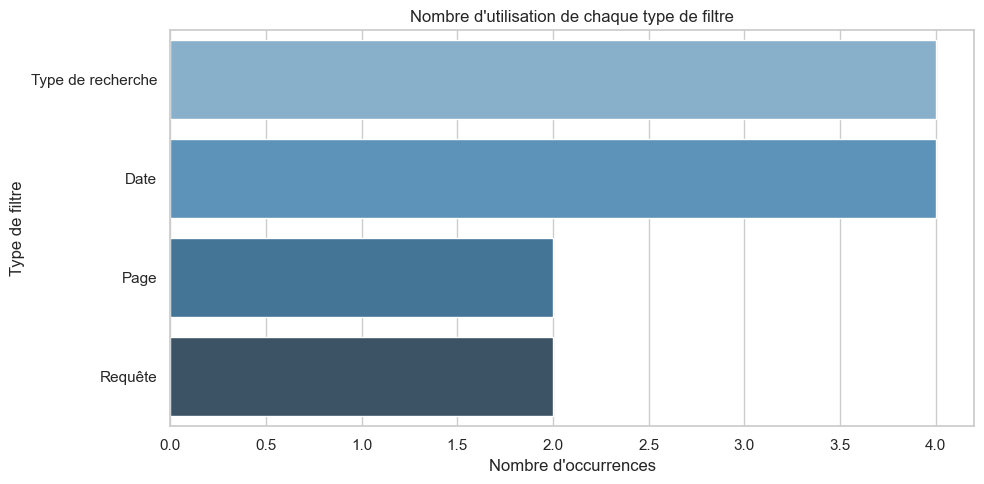

In [7]:
# 1. Nombre de filtres par type
plt.figure(figsize=(10, 5))
sns.countplot(data=filtres_df, y="Filtre", order=filtres_df['Filtre'].value_counts().index, hue="Filtre",
    palette="Blues_d",
    legend=False)
plt.title("Nombre d'utilisation de chaque type de filtre")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Type de filtre")
plt.tight_layout()
plt.show()

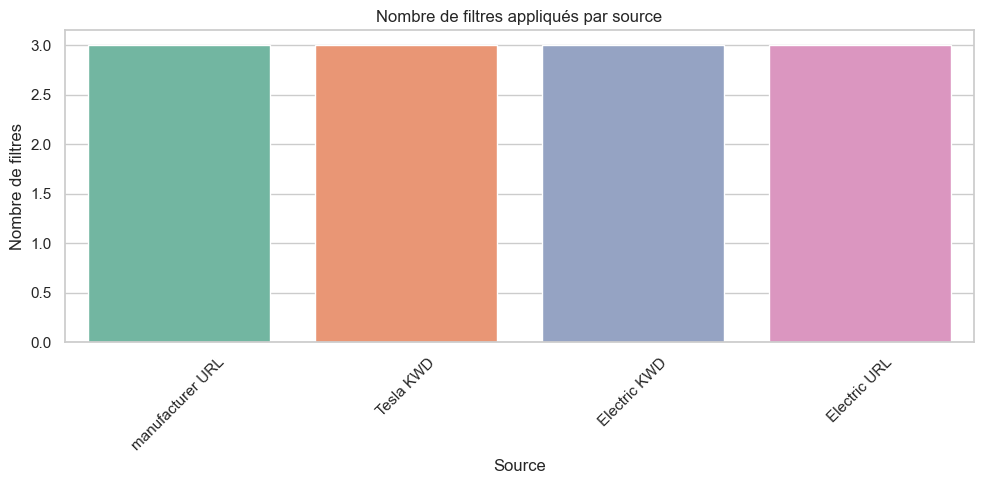

In [10]:
# 2. Nombre de filtres par source
plt.figure(figsize=(10, 5))
sns.countplot(data=filtres_df, x="Source", order=filtres_df['Source'].value_counts().index, hue="Source", palette="Set2", legend=False)
plt.title("Nombre de filtres appliqués par source")
plt.ylabel("Nombre de filtres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

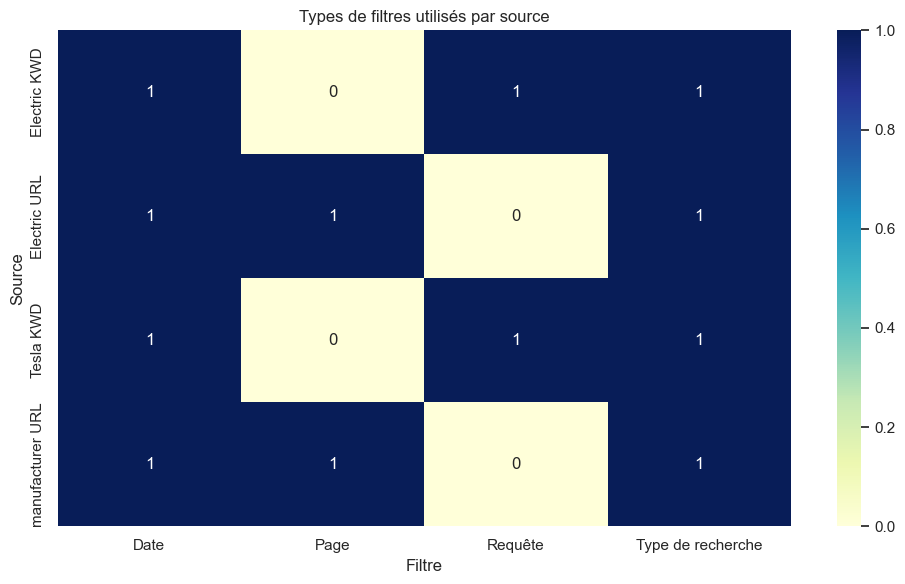

In [11]:
# 3. Carte des types de filtres par source (heatmap des combinaisons)
ct = pd.crosstab(filtres_df['Source'], filtres_df['Filtre'])
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Types de filtres utilisés par source")
plt.xlabel("Filtre")
plt.ylabel("Source")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15320\1363879071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtres_top_valeurs, y="Valeur", order=filtres_top_valeurs['Valeur'].value_counts().head(10).index, palette="pastel")


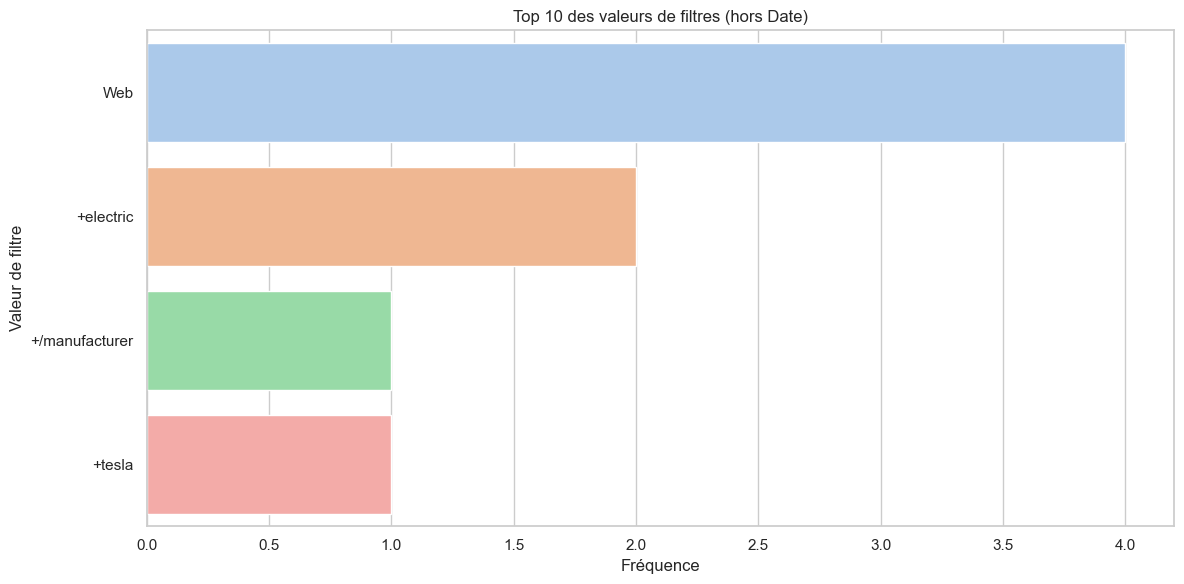

In [12]:
# 4. Top valeurs de filtre (hors Date)
filtres_top_valeurs = filtres_df[filtres_df['Filtre'] != 'Date']
plt.figure(figsize=(12, 6))
sns.countplot(data=filtres_top_valeurs, y="Valeur", order=filtres_top_valeurs['Valeur'].value_counts().head(10).index, palette="pastel")
plt.title("Top 10 des valeurs de filtres (hors Date)")
plt.xlabel("Fréquence")
plt.ylabel("Valeur de filtre")
plt.tight_layout()
plt.show()

###  Liens avec les autres datasets

- Les filtres appliqués (ici) structurent les extractions visibles dans les datasets **Requêtes**, **Pages**, **Pays**.
- Par exemple :
  - Un filtre `Page = +/manufacturer` impacte directement les lignes du fichier `pages_all.xlsx` → on peut analyser si ces pages performent bien.
  - Un filtre `Requête = +tesla` permet d’isoler les mots-clés Tesla dans `requêtes_all.xlsx`.
- Cette analyse des filtres est donc essentielle pour comprendre **le contexte de collecte des données** et **la cohérence des segments étudiés**.
